In [98]:
import pandas as pd
import numpy as np
from numpy import argmax
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# (Jason Brownlee, Machine Learning Mastery) Based my code off of some of his tutorials

In [192]:
read_file = pd.read_excel(r'Share Class Results.xlsx', sheet_name = 'Shareclasses')
read_file.to_csv(r'Share Class Results.csv', index = None, header=True)
df = pd.read_csv('Share Class Results.csv')
selected_columns = df[["Fund profile: Shareclass name", \
                       "Fossil Free Funds: Fossil fuel holdings, weight", \
                       "Fossil Free Funds: Relative carbon footprint (tonnes CO2 / $1M USD invested)", \
                       "Fossil Free Funds: Clean200, weight",\
                       "Fossil Free Funds: Fossil fuel grade"]]
dataset = selected_columns.copy()
dataset.dropna()
dataset

,Fund profile: Shareclass name,"Fossil Free Funds: Fossil fuel holdings, weight",Fossil Free Funds: Relative carbon footprint (tonnes CO2 / $1M USD invested),"Fossil Free Funds: Clean200, weight",Fossil Free Funds: Fossil fuel grade
0,13D Activist A,0.052510,175.67,0.024756,C
1,13D Activist C,0.052510,175.67,0.024756,C
2,13D Activist I,0.052510,175.67,0.024756,C
3,1919 Socially Responsive Balanced A,0.000000,27.47,0.168076,A
4,1919 Socially Responsive Balanced C,0.000000,27.47,0.168076,A
...,...,...,...,...,...
8781,Xtrackers S&P 500 ESG ETF,0.059366,46.99,0.264717,D
8782,Xtrackers S&P MidCap 400 ESG ETF,0.037695,201.98,0.027165,C
8783,Xtrackers S&P SmallCap 600 ESG ETF,0.048334,147.02,0.005846,C
8784,iClima Distributed Smart Energy ETF,0.000000,89.69,0.393784,A


In [100]:
print(dataset.groupby('Fossil Free Funds: Fossil fuel grade').size())

Fossil Free Funds: Fossil fuel grade
A    1598
B    1491
C    1334
D    2186
F    2177
dtype: int64


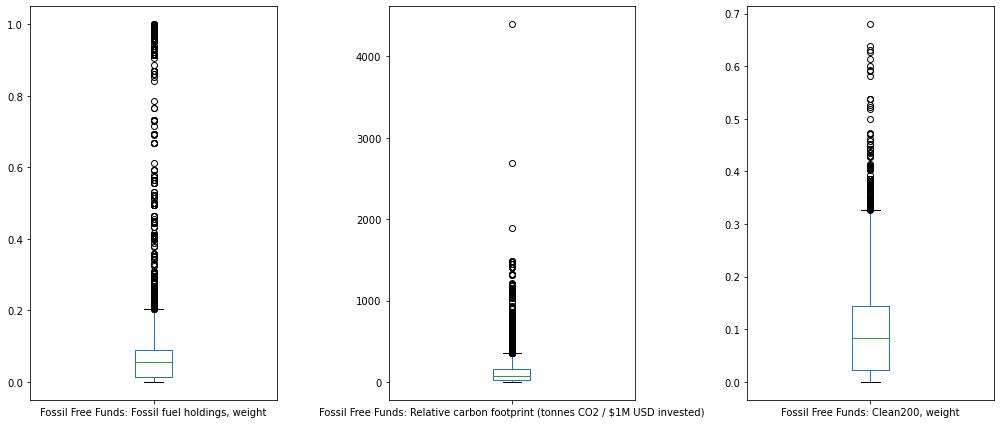

In [187]:
dataset.plot(kind='box', figsize=(14, 6), subplots=True, sharex=False, sharey=False)
pyplot.tight_layout()
pyplot.savefig('ML_boxplot.png')
pyplot.show()

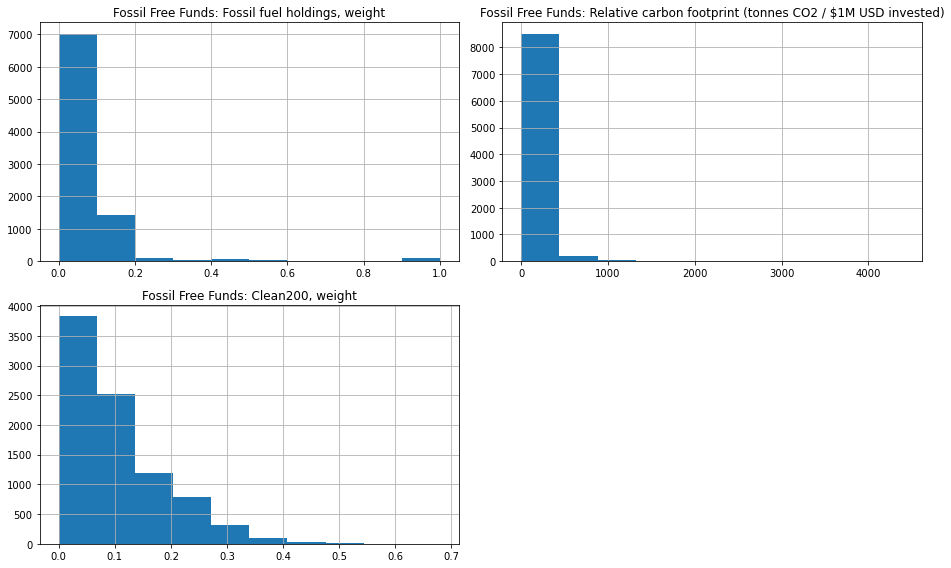

In [188]:
dataset.hist(figsize=(13, 8))
pyplot.tight_layout()
pyplot.savefig('ML_hist.png')
pyplot.show()

In [111]:
np = dataset.values
X = np[:,1:4]
y = np[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [112]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [157]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.583668 (0.014642)
LDA: 0.489614 (0.018377)
KNN: 0.799091 (0.015358)
CART: 1.000000 (0.000000)
NB: 0.892003 (0.009796)
SVM: 0.597471 (0.017781)


Classification And Regression Trees has the largest estimated accuracy score at 100%

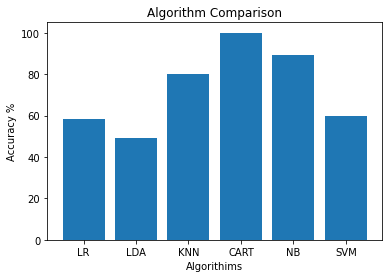

In [189]:
accuracies = [58.37, 48.96, 79.91, 100, 89.20, 59.75]
labels = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']

pyplot.bar(labels, accuracies)
pyplot.xlabel('Algorithims')
pyplot.ylabel('Accuracy %')
pyplot.title('Algorithm Comparison')
pyplot.savefig('ML_bar.png')
pyplot.show()

In [184]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[335   0   0   0   0]
 [  0 303   0   0   0]
 [  0   0 272   0   0]
 [  0   0   0 418   0]
 [  0   0   0   0 430]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       335
           B       1.00      1.00      1.00       303
           C       1.00      1.00      1.00       272
           D       1.00      1.00      1.00       418
           F       1.00      1.00      1.00       430

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

